# Regression (California Housing Dataset)

This notebook covers regression models using the California housing dataset.

Topics Covered:
Data Preprocessing
Linear Regression
Decision Trees for Regression
Ensemble Learning (Random Forest)
Model Evaluation (R², RMSE, MAE)

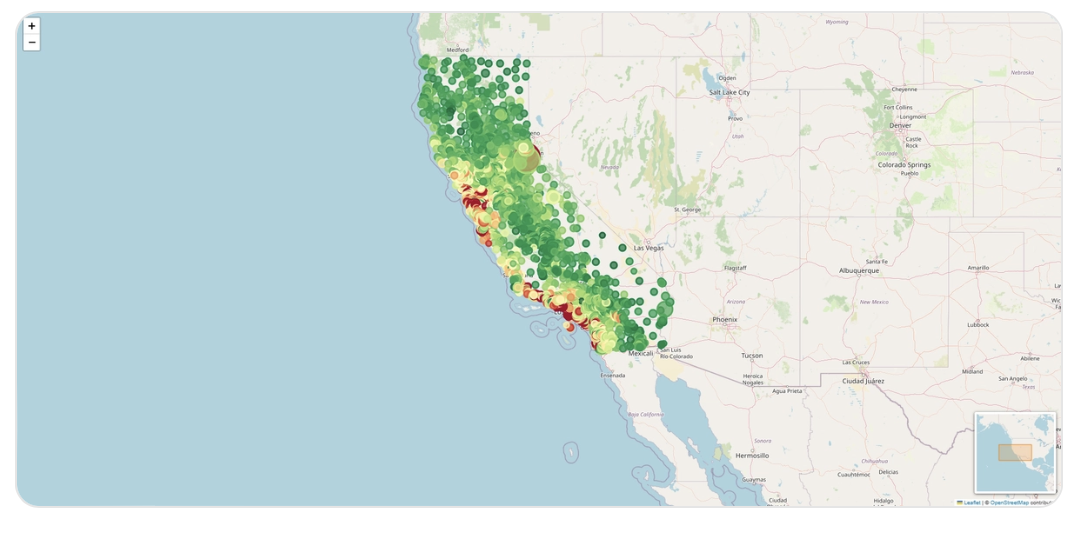

In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

In [16]:
# Load the dataset
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['target'] = california.target  # Target variable




In [17]:
df.head(30)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


In [18]:
# Display basic info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [19]:
df.describe()



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


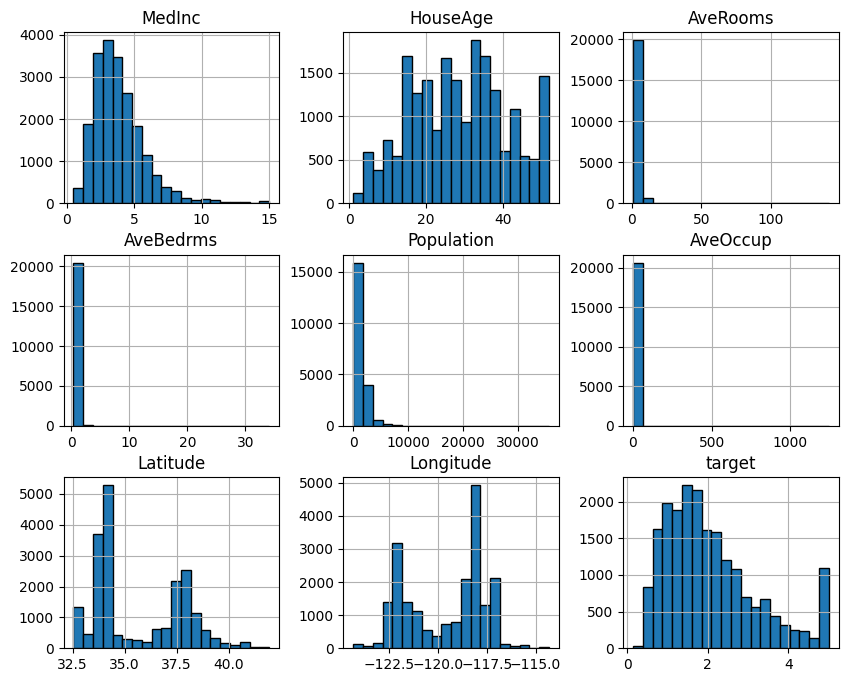

In [20]:
# Visualize distributions
df.hist(figsize=(10, 8), bins=20, edgecolor='black')
plt.show()



# From the histogram visualization we can infer several things about the dataset:

1. Feature Distributions:
Some features, like** MedInc (Median Income) and HouseAge**, have a relatively normal or right-skewed distribution.
Features like** AveRooms, AveBedrms, and AveOccup** have highly skewed distributions with a large number of small values.
**Population and AveOccup show extreme skewness, indicating the presence of outliers or a long-tailed distribution.**
Latitude and Longitude represent geographic locations, with distinct clustering patterns.
2. Target Variable (target):
The target histogram shows that house prices (assumed from California Housing Dataset) follow a skewed distribution, meaning most houses fall into a lower price range while fewer are at higher prices.
3. Potential Preprocessing Needs:
Feature scaling: Given the varying ranges in the dataset, standardization or normalization would help models perform better.
Outlier handling: Features like Population and AveOccup may require log transformation or capping extreme values.
Feature engineering: Some highly skewed features might benefit from transformations or binning.
4. Next Steps:
Check the correlation heatmap to understand relationships between features.
Consider applying transformations (log scaling, standardization) to highly skewed variables.
Visualize interactions between variables to determine key predictive features.

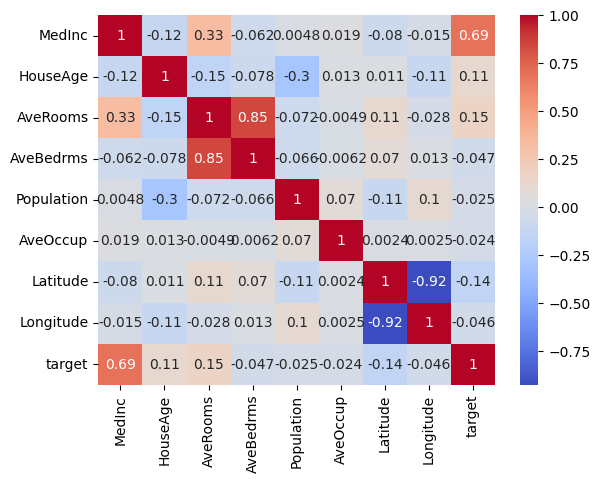

In [21]:
# Correlation heatmap
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

1. Strong Positive Correlation with target (House Prices)
MedInc (Median Income): Correlation of 0.69, making it the strongest predictor of house prices.
AveRooms (Average Rooms per Household): Moderate positive correlation (0.15) with house prices.
2. Weak or Negative Correlation with target
Latitude (-0.14) & Longitude (-0.05): Slight negative correlation, suggesting that location (possibly closer to the coast or urban areas) may impact house prices.
Population, AveOccup, and HouseAge show weak correlations with house prices, meaning they may not be strong predictors.
3. High Feature Interdependencies
AveRooms and AveBedrms have a strong correlation (0.85), meaning they provide similar information and could cause multicollinearity in regression models.
Latitude and Longitude have a strong negative correlation (-0.92), indicating that geographic locations are tightly related.
4. What This Means for Modeling
Feature Selection: MedInc should be a primary predictor.
Potential Feature Engineering: AveRooms and AveBedrms could be combined into a new feature.
Check for Multicollinearity: If using regression, avoid using strongly correlated variables together to prevent redundancy.

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Extract features and labels
X = df.drop(columns=['target'])
y = df['target']

# Split data include validation
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [24]:
# Dictionary of models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(max_depth=5),  # Fill in depth
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)  # Fill in estimators
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(f"\n{model_name} Results:")
    print(f"R2 Score: {r2_score(y_test,y_pred):.4f}")
    # Calculate RMSE manually using NumPy if squared=False is not supported
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")



Linear Regression Results:
R2 Score: 0.5758
RMSE: 0.7456
MAE: 0.5332

Decision Tree Results:
R2 Score: 0.5997
RMSE: 0.7242
MAE: 0.5223

Random Forest Results:
R2 Score: 0.8053
RMSE: 0.5051
MAE: 0.3274


Random Forest:

1. R² Score Comparison:

Random Forest achieves the highest R² score (~0.8053), meaning it explains the most variance in the data.

Decision Tree performs better than Linear Regression but is not as strong as Random Forest.

Linear Regression has the lowest R² score (~0.5758), indicating weaker performance on this dataset.

2. RMSE (Root Mean Squared Error) Comparison:

Lower RMSE is better; Random Forest has the lowest (~0.5051), indicating better predictive accuracy.


 Decision Tree (0.6478) performs better than Linear Regression (0.7456).

3. MAE (Mean Absolute Error) Comparison:

Random Forest has the lowest MAE (~0.3274), making it the most precise in terms of absolute errors.

Decision Tree (0.4334) performs better than Linear Regression (0.5332).

**Key Takeaways:**

Random Forest outperforms the other models across all metrics and is likely the best choice.

Decision Tree provides a middle ground but might overfit.

Linear Regression struggles with non-linearity, as seen in its lower R² score.